In [102]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv("stressed.csv") 

In [3]:
df.sample(3) 

,Gender,financial_issues,family_issues,study_hours,health_issues,friends_issues,friends_time,overload,unpleasant,academic,career,criticism,conflicts,stress_level
137,Male,Payment for room rent,Parental Expectations,2,Sinus or Migraine or Headaches,Jealousy,3,No,No,No,No,No,No,Normal
184,Male,Repay Loan Issues,Internal family dispute,1,Low Energy,NaN,2,No,No,No,No,No,No,Normal
43,Female,Repay Loan Issues;Payment for Hostel,Parental Expectations;Divorce of Parents;Poor ...,2,Malnutrition;Low Energy;Sleeping Problem,Mistrust,7,Yes,Yes,Yes,No,No,Yes,Stressed


In [4]:
df.shape 

(213, 14)

In [5]:
df.describe() 

,study_hours,friends_time
count,213.000000,213.000000
mean,3.483568,3.943662
std,2.372397,2.258447
min,0.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,5.000000
max,10.000000,10.000000


In [6]:
df.dtypes

Gender              object
financial_issues    object
family_issues       object
study_hours          int64
health_issues       object
friends_issues      object
friends_time         int64
overload            object
unpleasant          object
academic            object
career              object
criticism           object
conflicts           object
stress_level        object
dtype: object

In [119]:
encoder = LabelEncoder() 

In [39]:
df["Gender"] = encoder.fit_transform(df["Gender"])
df["financial_issues"] = encoder.fit_transform(df["financial_issues"].astype(str))
df["family_issues"] = encoder.fit_transform(df["family_issues"].astype(str))
df["health_issues"] = encoder.fit_transform(df["health_issues"].astype(str))
df["friends_issues"] = encoder.fit_transform(df["friends_issues"].astype(str))
df["overload"] = encoder.fit_transform(df["overload"].astype(str))
df["unpleasant"] = encoder.fit_transform(df["unpleasant"].astype(str))
df["academic"] = encoder.fit_transform(df["academic"].astype(str))
df["career"] = encoder.fit_transform(df["career"].astype(str))
df["criticism"] = encoder.fit_transform(df["criticism"].astype(str))
df["conflicts"] = encoder.fit_transform(df["conflicts"].astype(str))
df["stress_level"] = encoder.fit_transform(df["stress_level"].astype(str)) 

In [9]:
df = df.apply(lambda col: col.fillna(col.mode()[0]), axis=0) 

In [10]:
df.isnull().sum() 

Gender              0
financial_issues    0
family_issues       0
study_hours         0
health_issues       0
friends_issues      0
friends_time        0
overload            0
unpleasant          0
academic            0
career              0
criticism           0
conflicts           0
stress_level        0
dtype: int64

In [11]:
df.head(3) 

,Gender,financial_issues,family_issues,study_hours,health_issues,friends_issues,friends_time,overload,unpleasant,academic,career,criticism,conflicts,stress_level
0,Male,Deadline of Fee payment;Payment for Hostel,Parental Expectations,2,Sleeping Problem;Concentration Problem,Jealousy,5,No,Yes,Yes,Yes,Yes,No,Stressed
1,Male,Deadline of Fee payment,Parental Expectations,2,Anxiety or Tension,Mistrust,1,No,No,No,No,No,Yes,Stressed
2,Male,Deadline of Fee payment;Payment for Hostel,Parental Expectations,4,Insomnia (Sleep Deprivation);Low Energy;Anxiet...,Jealousy,10,Yes,Yes,Yes,No,Yes,Yes,Stressed


Text(0, 0.5, 'Count')

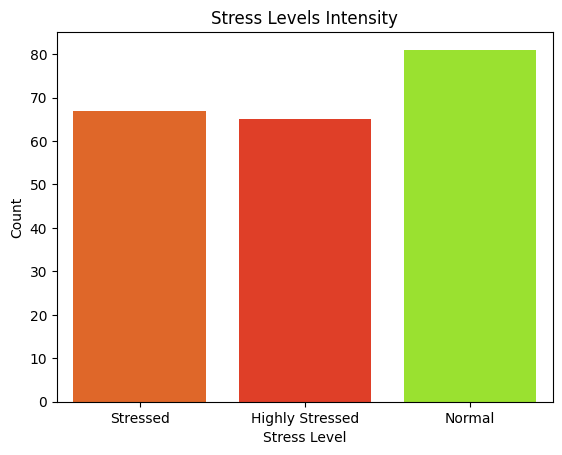

In [12]:
custom_palette = {'Normal': '#a0ff12', 'Stressed': '#fd5d0b', 'Highly Stressed': '#fd280a'}

# Count plot with `hue` set to `x` variable and legend disabled
sns.countplot(data=df, x='stress_level', hue='stress_level', palette=custom_palette, legend=False)
plt.title('Stress Levels Intensity')
plt.xlabel('Stress Level')
plt.ylabel('Count') 

In [43]:
categorical_columns = df.select_dtypes(include=['object']).columns 

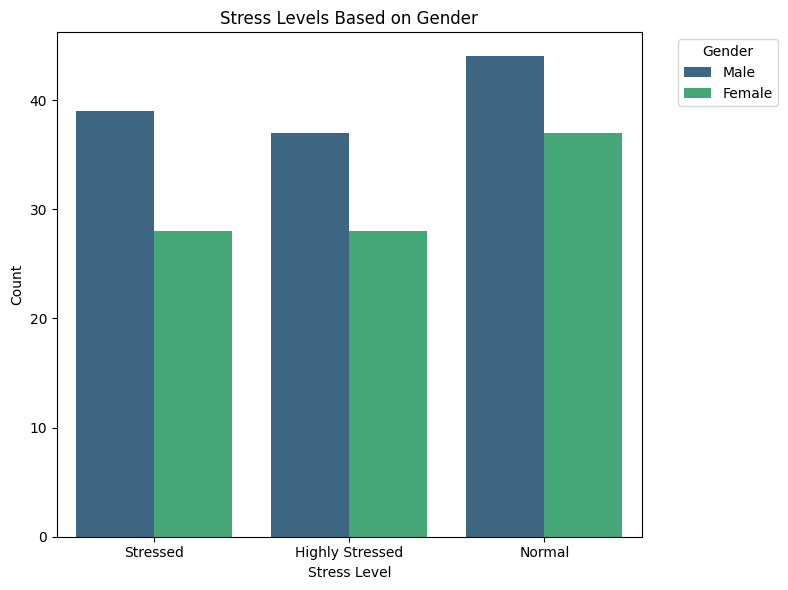

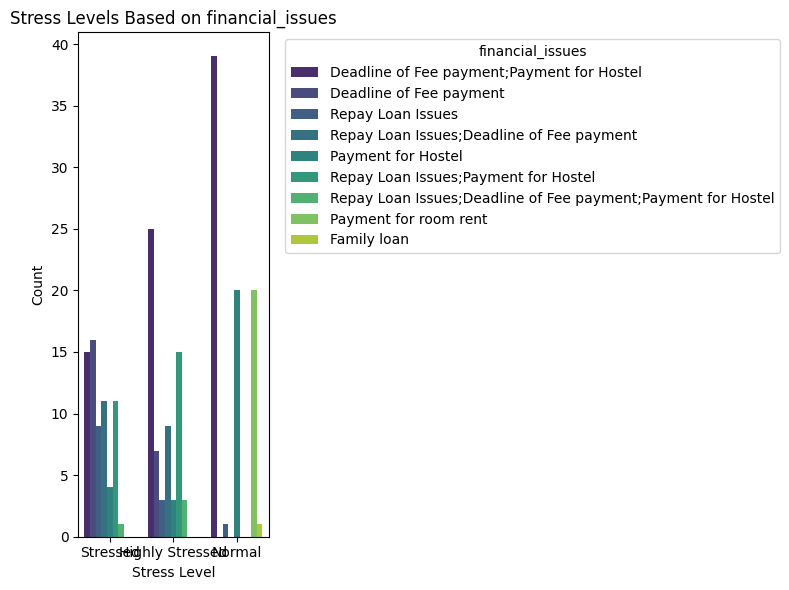

C:\Users\hp\AppData\Local\Temp\ipykernel_19900\3027201222.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


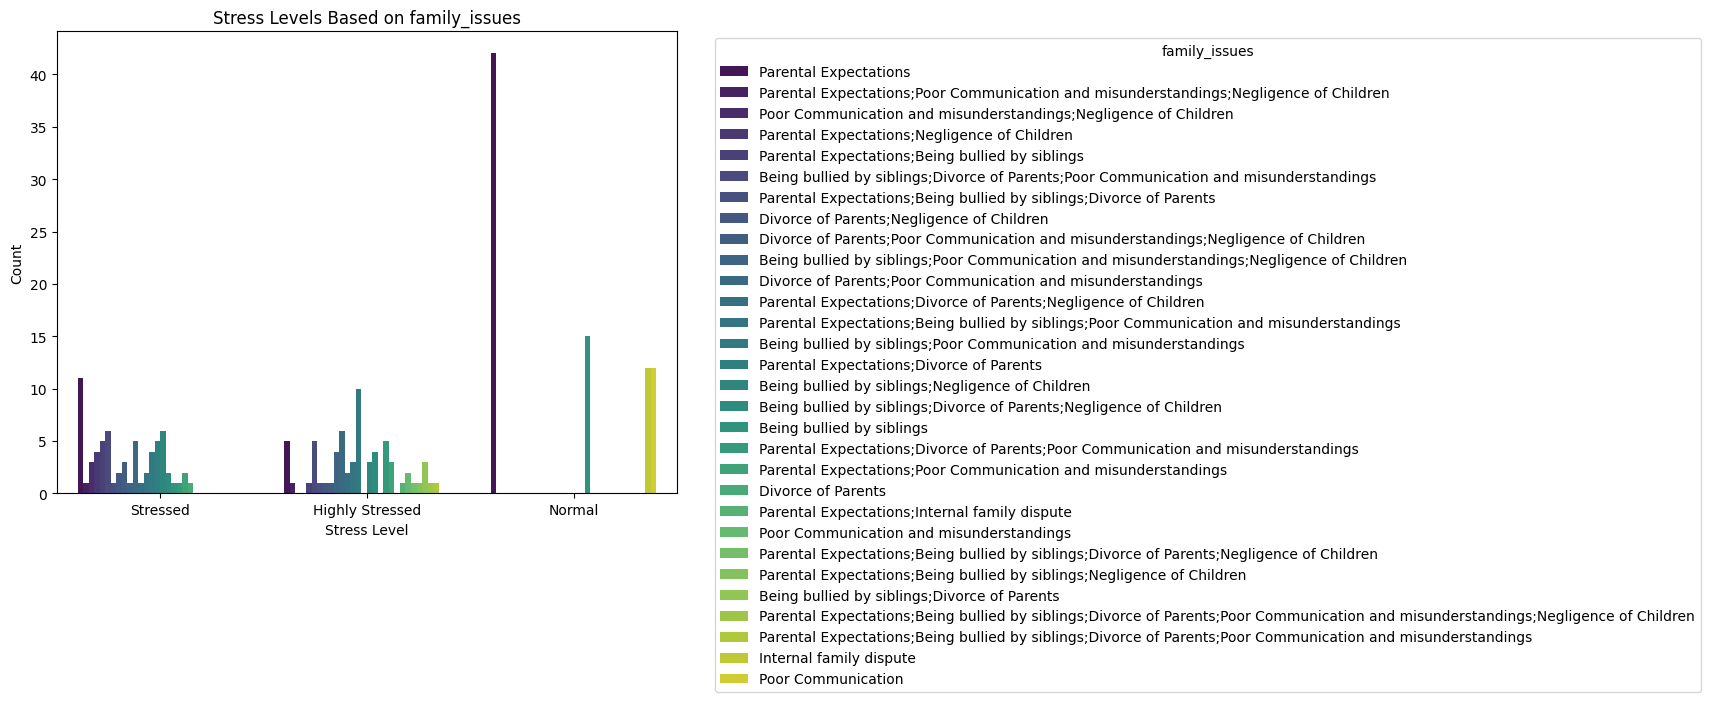

C:\Users\hp\AppData\Local\Temp\ipykernel_19900\3027201222.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


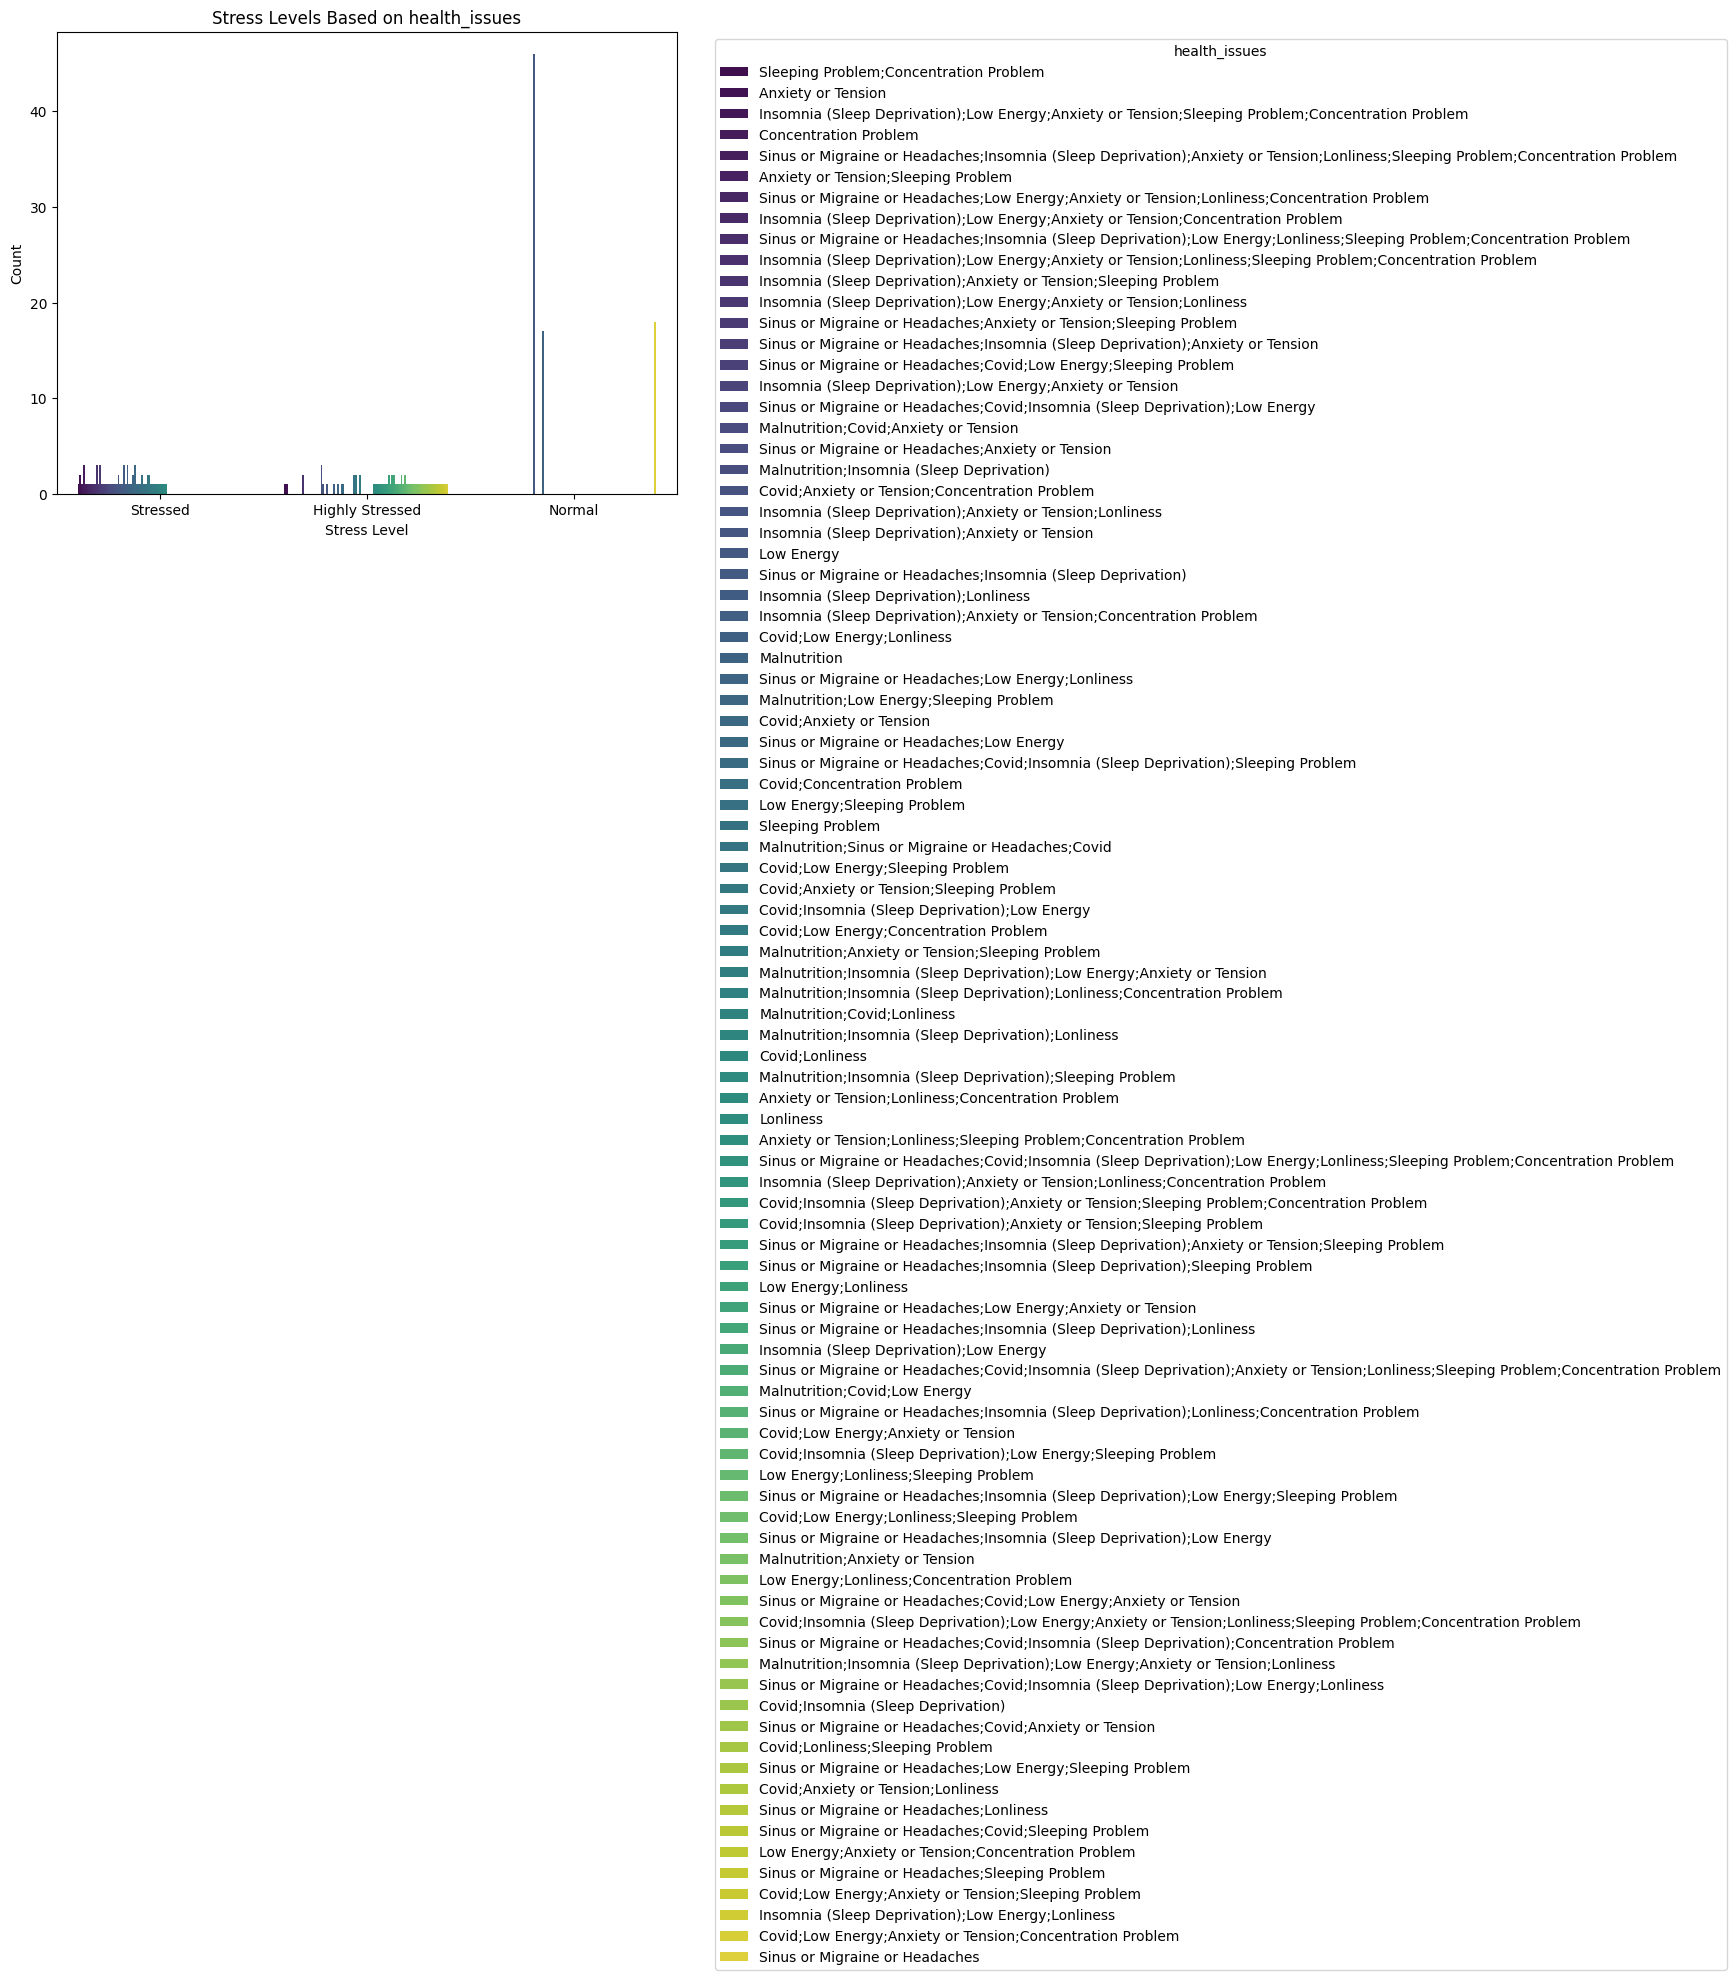

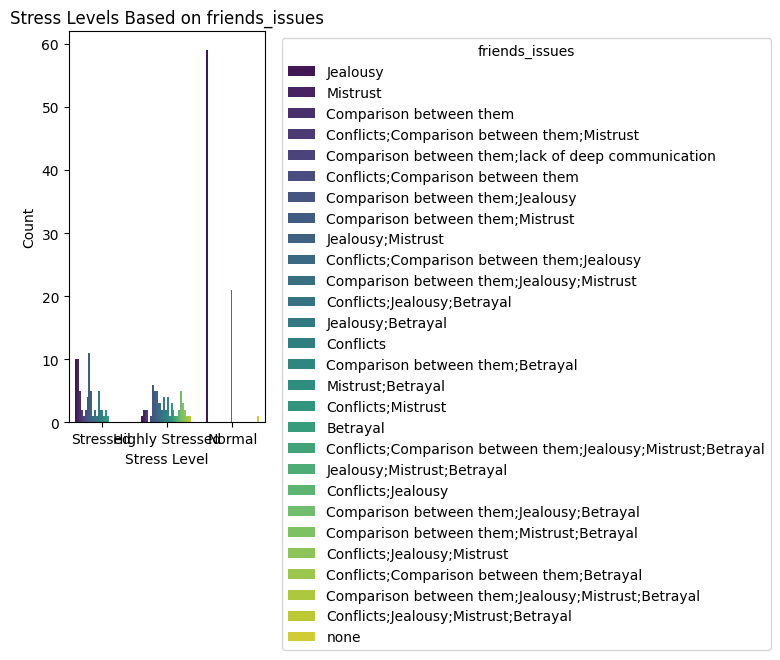

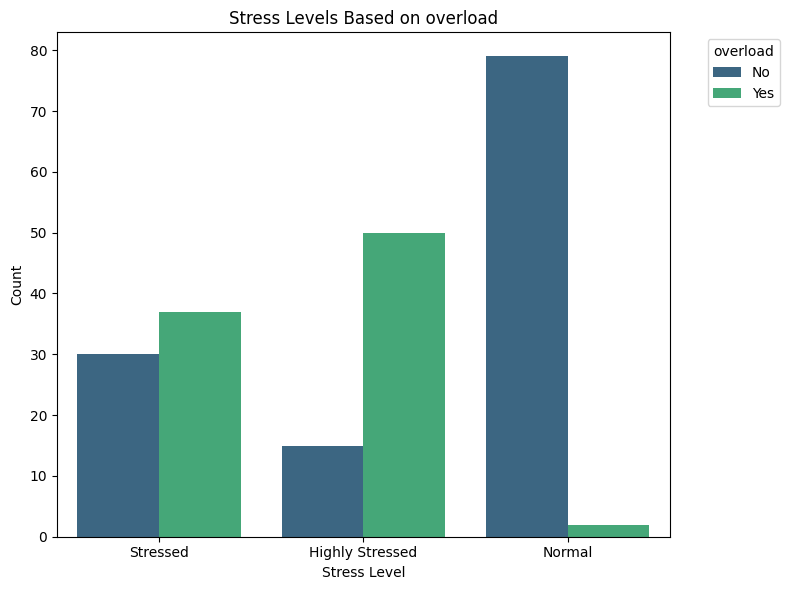

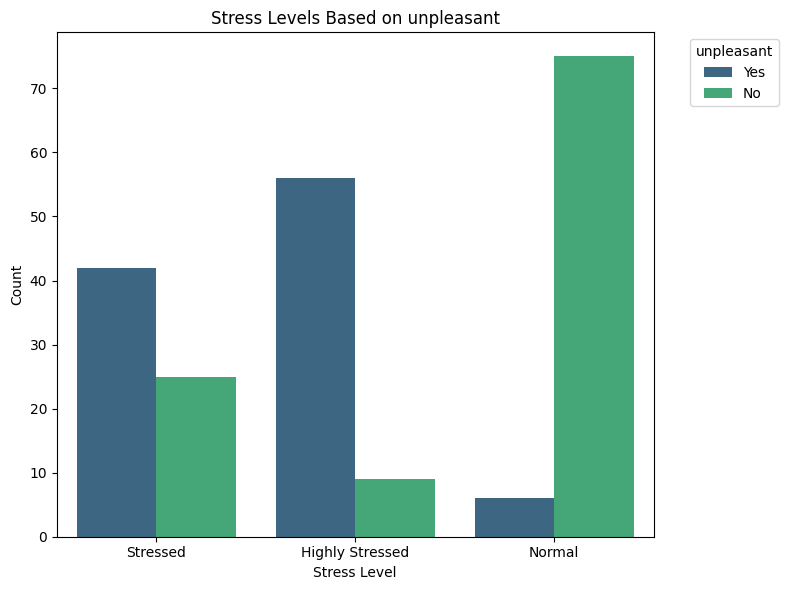

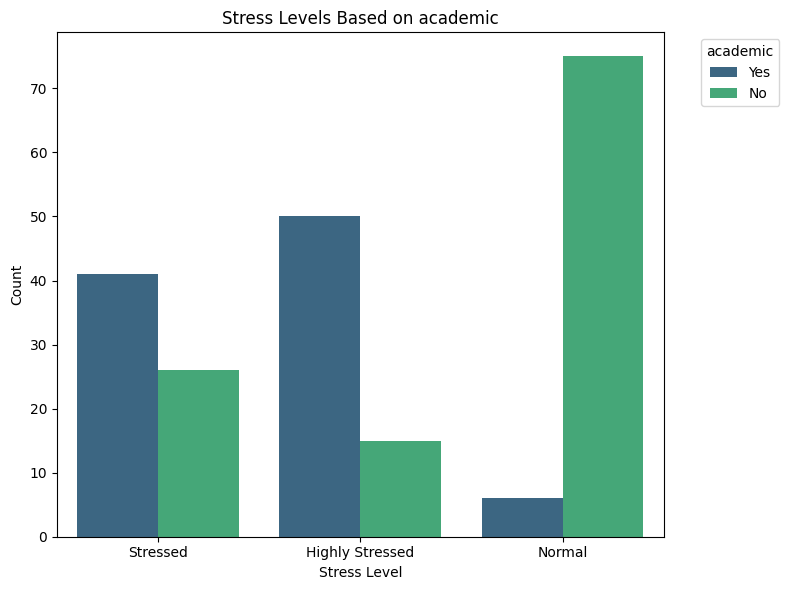

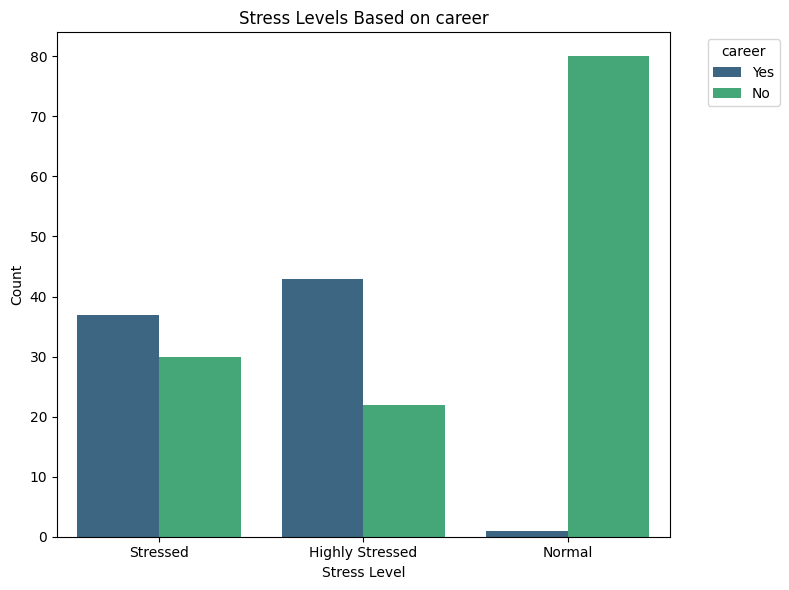

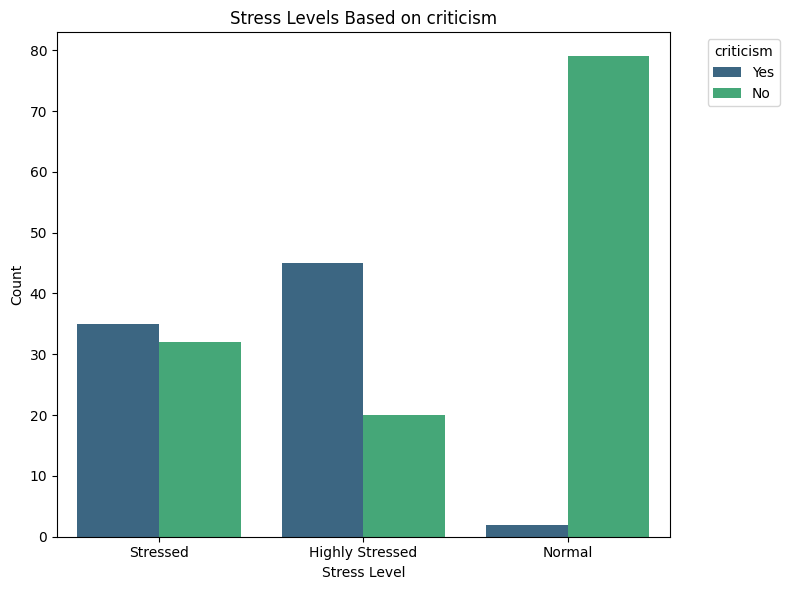

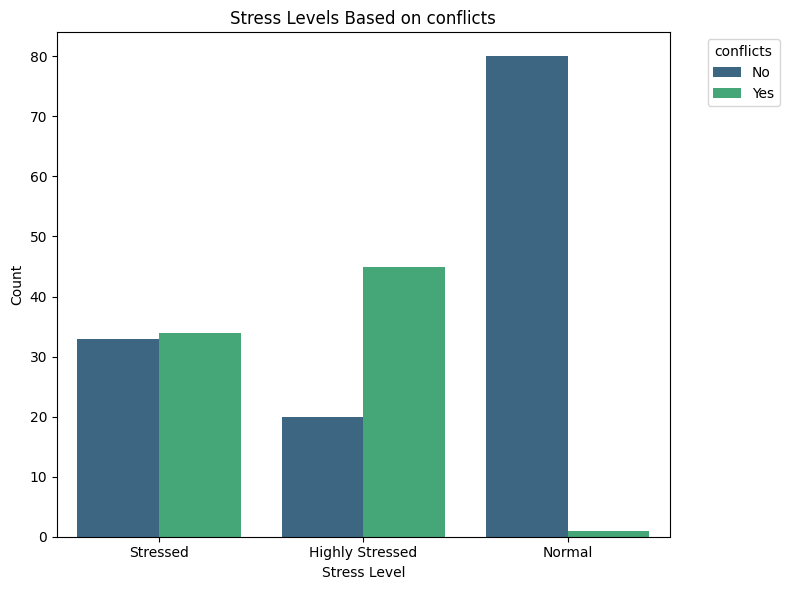

In [50]:
for column in categorical_columns:
    if column != 'stress_level':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x='stress_level', hue=column, dodge=True, palette='viridis')
        plt.title(f'Stress Levels Based on {column}')
        plt.xlabel('Stress Level')
        plt.ylabel('Count')
        plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show() 

In [41]:
df 

,Gender,financial_issues,family_issues,study_hours,health_issues,friends_issues,friends_time,overload,unpleasant,academic,career,criticism,conflicts,stress_level
0,Male,Deadline of Fee payment;Payment for Hostel,Parental Expectations,2,Sleeping Problem;Concentration Problem,Jealousy,5,No,Yes,Yes,Yes,Yes,No,Stressed
1,Male,Deadline of Fee payment,Parental Expectations,2,Anxiety or Tension,Mistrust,1,No,No,No,No,No,Yes,Stressed
2,Male,Deadline of Fee payment;Payment for Hostel,Parental Expectations,4,Insomnia (Sleep Deprivation);Low Energy;Anxiet...,Jealousy,10,Yes,Yes,Yes,No,Yes,Yes,Stressed
3,Male,Repay Loan Issues,Parental Expectations,5,Concentration Problem,Mistrust,10,No,Yes,Yes,Yes,Yes,Yes,Stressed
4,Male,Repay Loan Issues;Deadline of Fee payment,Parental Expectations;Poor Communication and m...,4,Sinus or Migraine or Headaches;Insomnia (Sleep...,Jealousy,1,Yes,Yes,Yes,Yes,No,Yes,Stressed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Female,Deadline of Fee payment;Payment for Hostel,Parental Expectations,4,Low Energy,Jealousy,6,No,No,No,No,No,No,Normal
209,Female,Deadline of Fee payment;Payment for Hostel,Parental Expectations,3,Low Energy,Jealousy,8,No,No,No,No,No,No,Normal
210,Female,Deadline of Fee payment;Payment for Hostel,Parental Expectations,2,Low Energy,Jealousy,10,No,No,No,No,No,No,Normal
211,Female,Deadline of Fee payment;Payment for Hostel,Parental Expectations,1,Low Energy,Jealousy,7,No,No,No,No,No,No,Normal


In [30]:
continuous_columns = df.columns[df.dtypes != 'object']

In [31]:
continuous_columns   

Index(['study_hours', 'friends_time'], dtype='object')

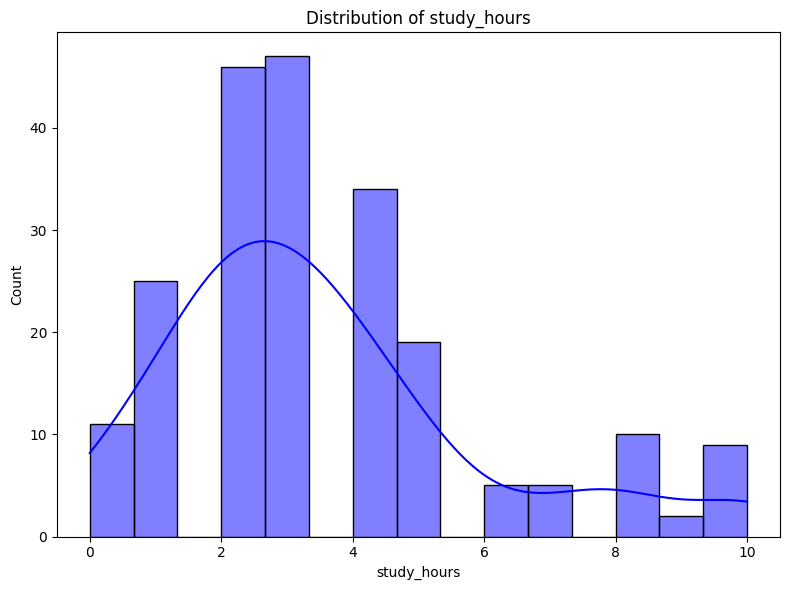

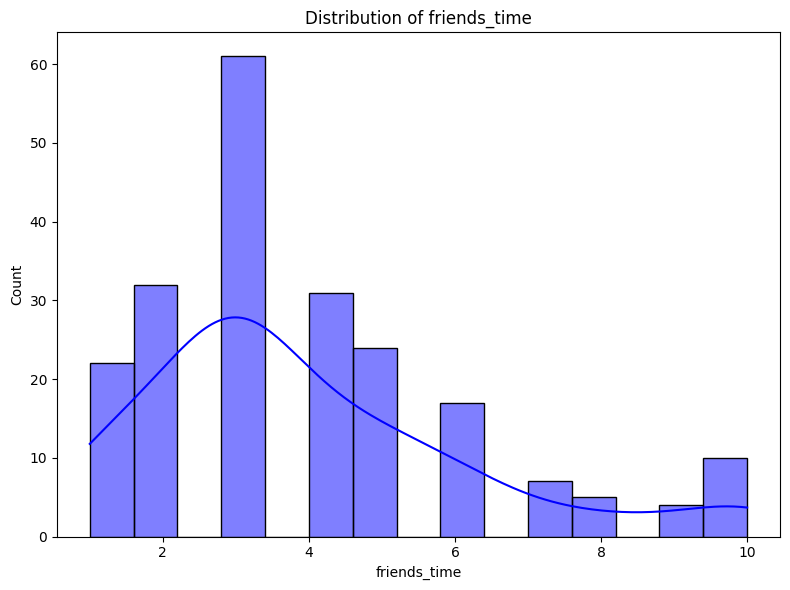

In [54]:
for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True, color='blue', bins = 15)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout() 

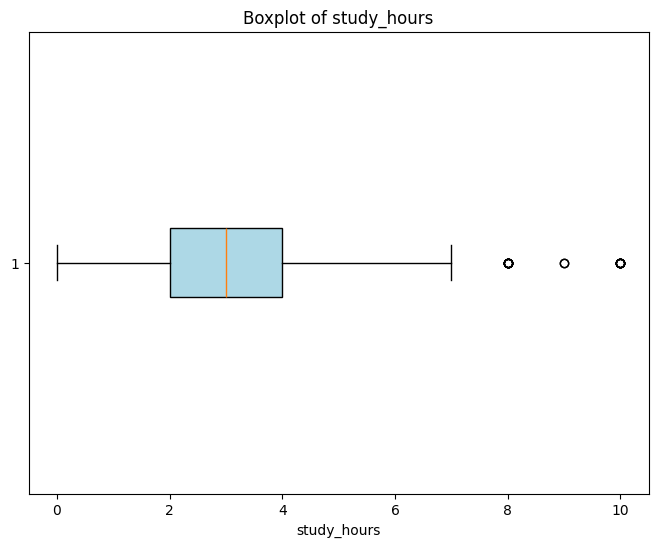

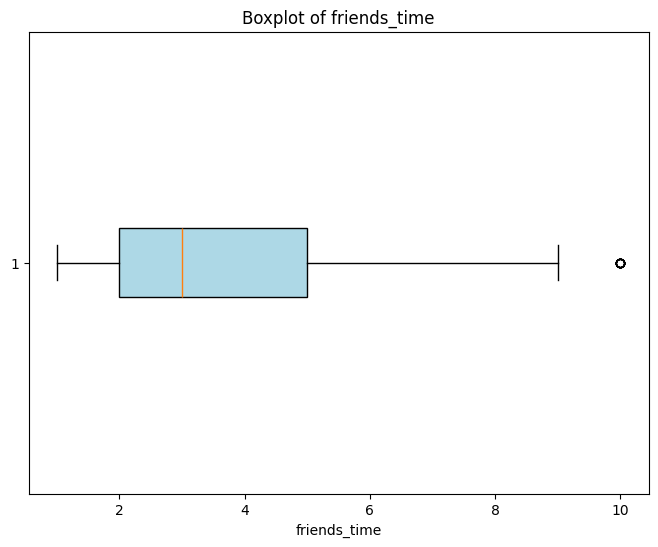

In [74]:
for feature in continuous_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show() 

In [76]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O'] 

In [77]:
categorical_features 

['Gender',
 'financial_issues',
 'family_issues',
 'health_issues',
 'friends_issues',
 'overload',
 'unpleasant',
 'academic',
 'career',
 'criticism',
 'conflicts',
 'stress_level']

In [87]:
encoder = LabelEncoder() 

In [88]:
df['stress_level'] = encoder.fit_transform(df['stress_level'])

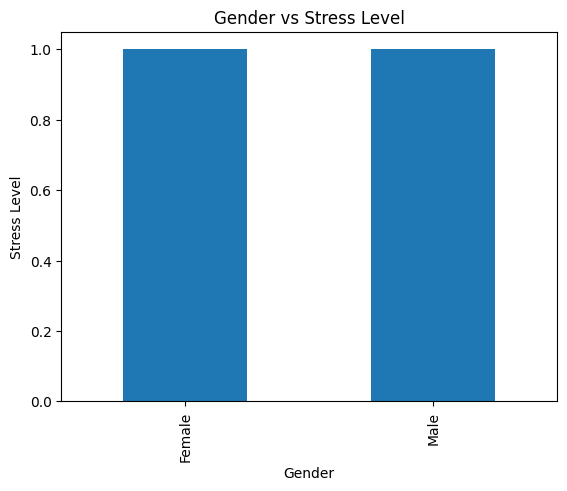

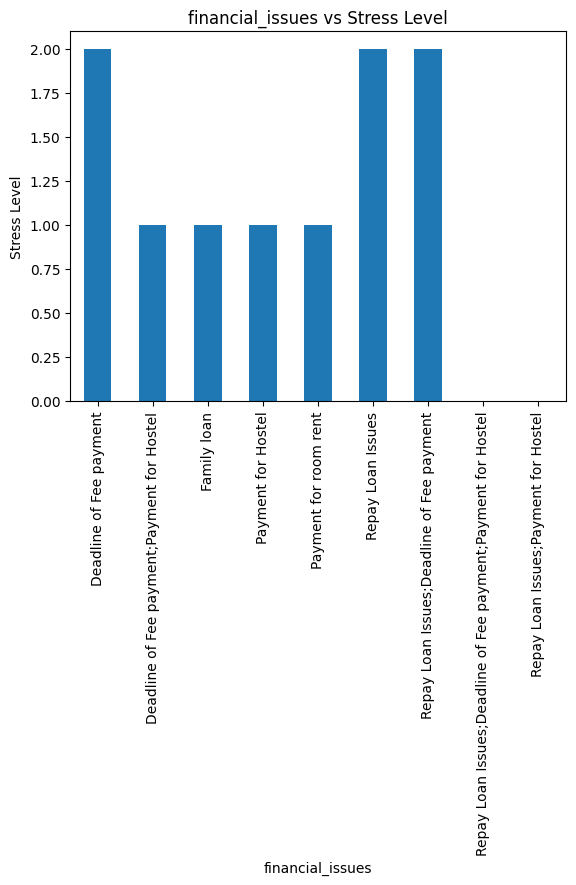

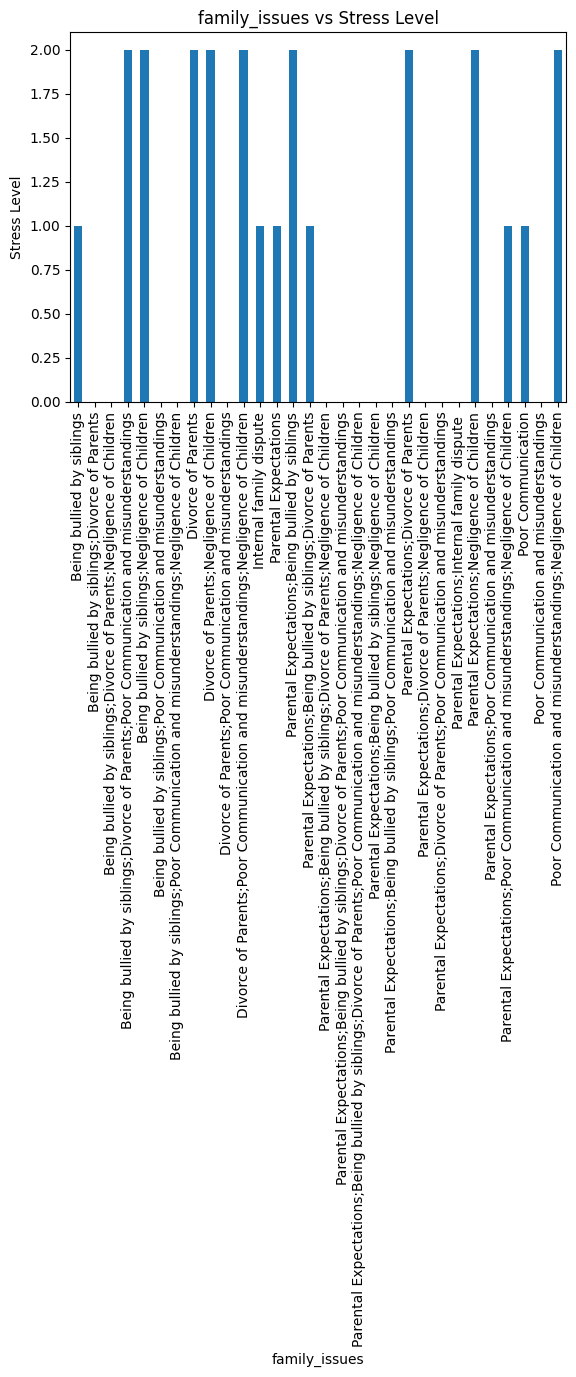

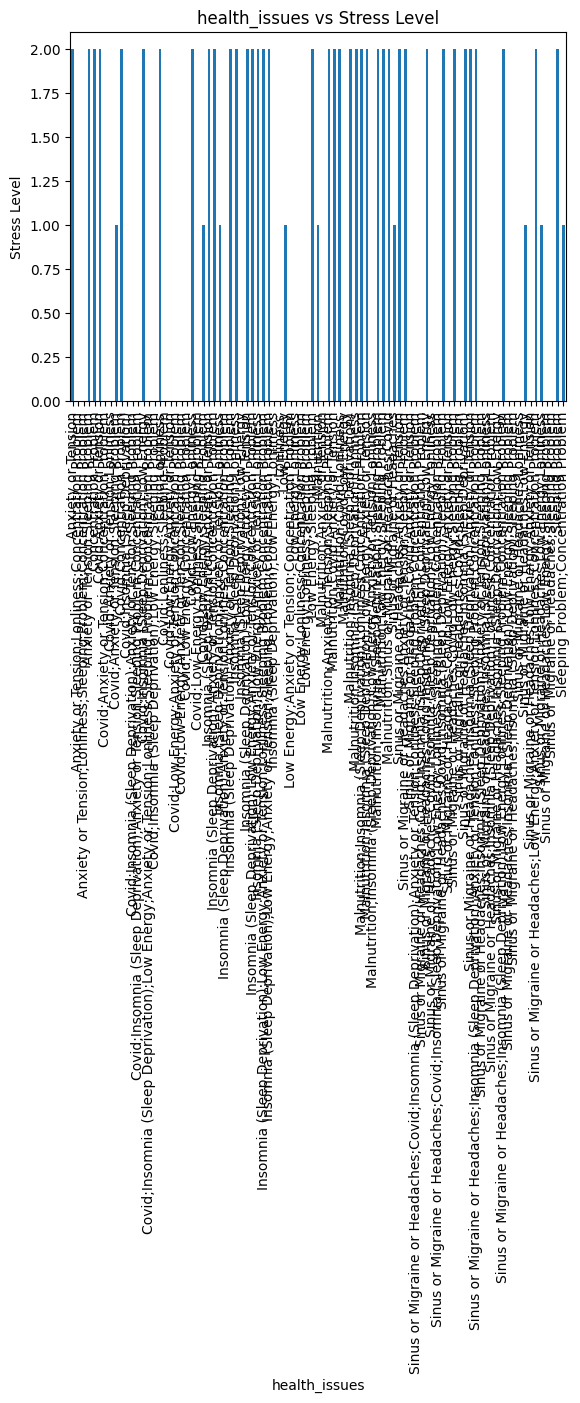

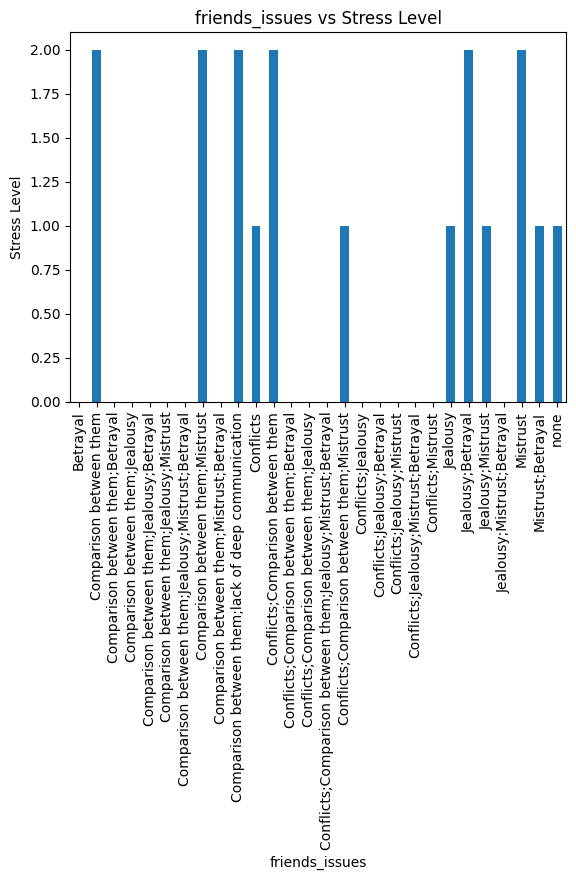

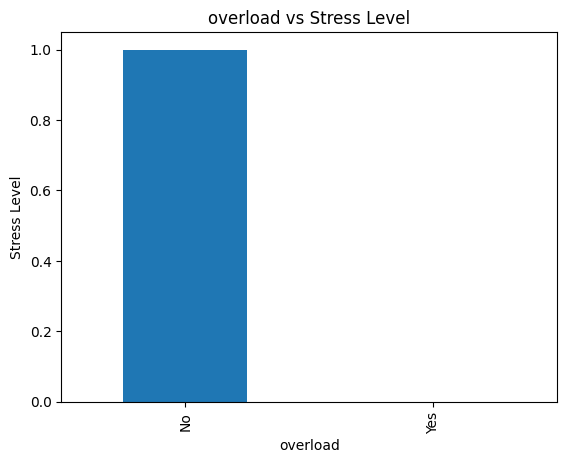

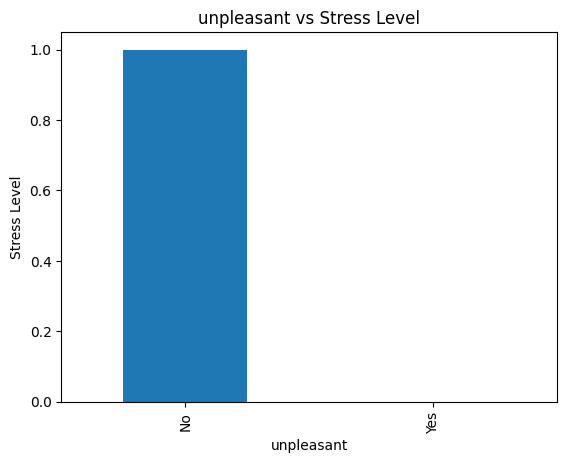

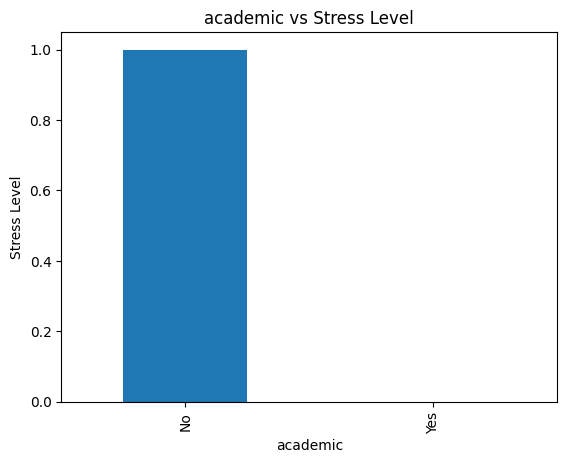

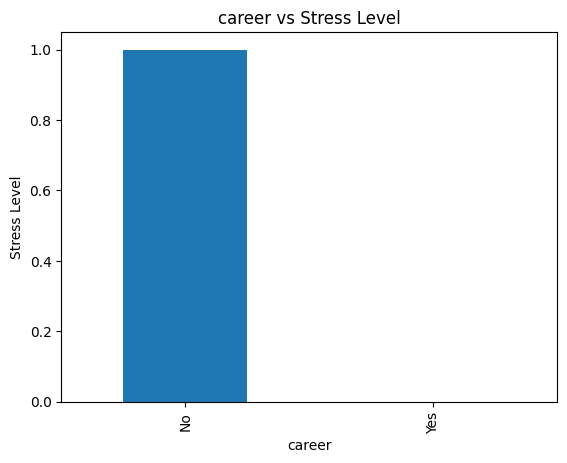

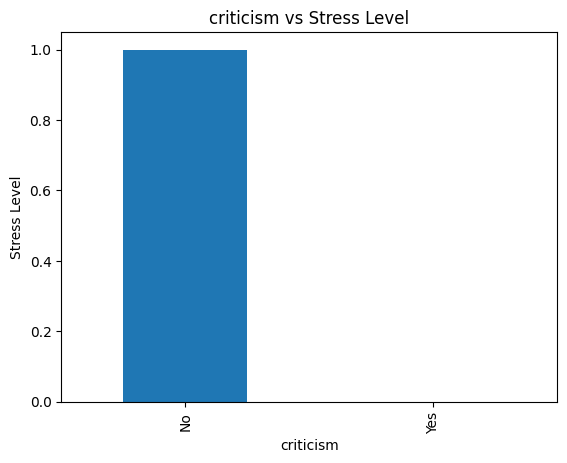

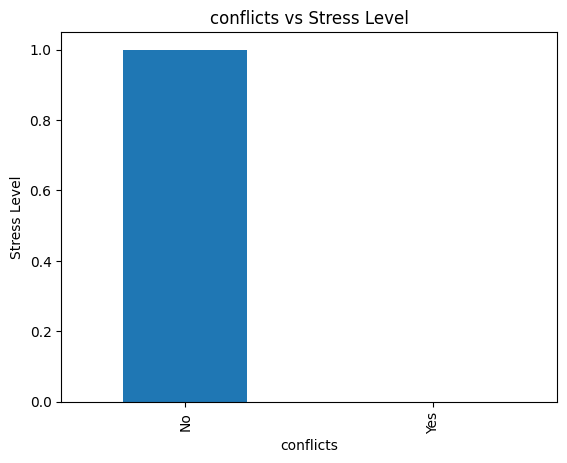

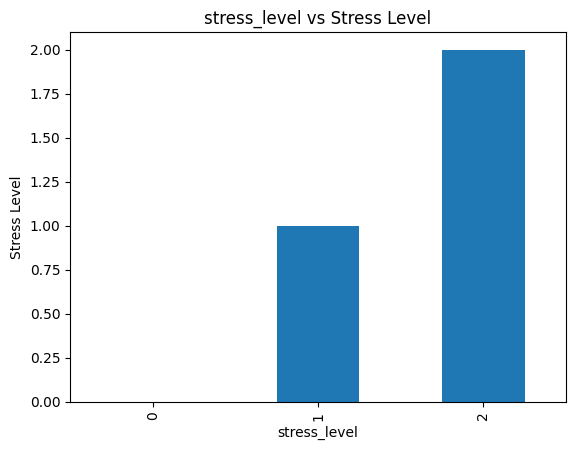

In [89]:
for feature in categorical_features: 
    data = df.copy()
    data.groupby(feature)['stress_level'].median().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Stress Level')
    plt.title(f'{feature} vs Stress Level')
    plt.show() 

In [90]:
for feature in continuous_columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Check the result
print(df.shape) 

(184, 14)


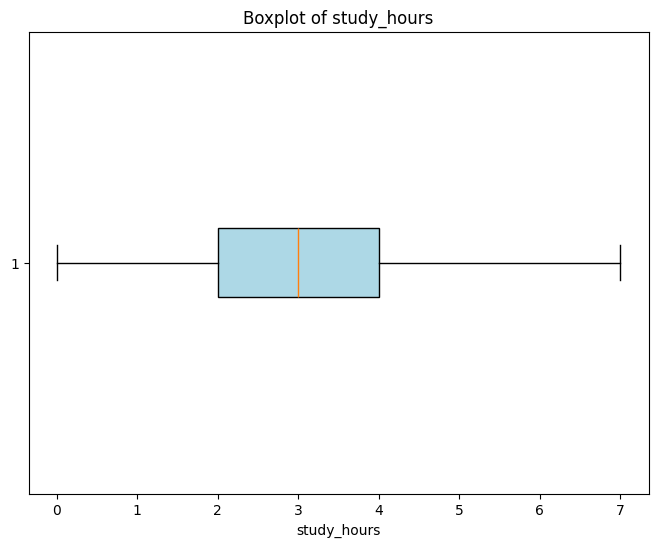

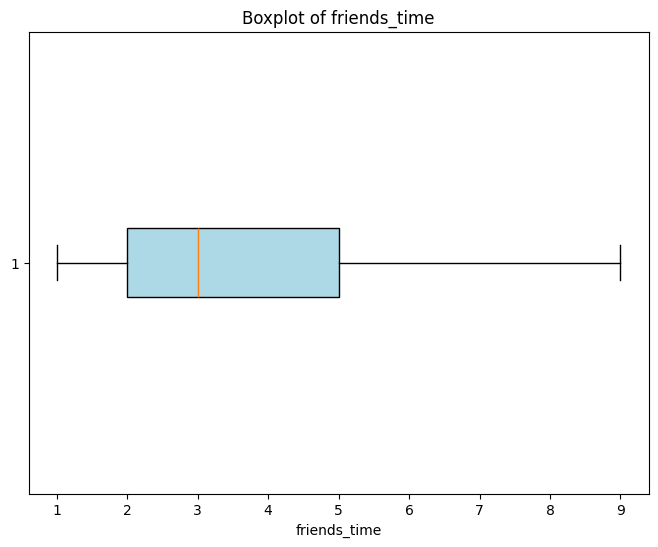

In [91]:
for feature in continuous_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show() 

FEATURE ENGINEERING 

In [95]:
df['Gender'] = encoder.fit_transform(df['Gender']) 

In [96]:
df = pd.get_dummies(df, columns=['financial_issues', 'health_issues'], drop_first=True) 

In [99]:
df 

,Gender,family_issues,study_hours,friends_issues,friends_time,overload,unpleasant,academic,career,criticism,...,health_issues_Sinus or Migraine or Headaches;Insomnia (Sleep Deprivation);Sleeping Problem,health_issues_Sinus or Migraine or Headaches;Lonliness,health_issues_Sinus or Migraine or Headaches;Low Energy,health_issues_Sinus or Migraine or Headaches;Low Energy;Anxiety or Tension,health_issues_Sinus or Migraine or Headaches;Low Energy;Anxiety or Tension;Lonliness;Concentration Problem,health_issues_Sinus or Migraine or Headaches;Low Energy;Sleeping Problem,health_issues_Sinus or Migraine or Headaches;Sleeping Problem,health_issues_Sleeping Problem,health_issues_Sleeping Problem;Concentration Problem,study_hours_category
0,1,Parental Expectations,2,Jealousy,5,No,Yes,Yes,Yes,Yes,...,False,False,False,False,False,False,False,False,True,Low
1,1,Parental Expectations,2,Mistrust,1,No,No,No,No,No,...,False,False,False,False,False,False,False,False,False,Low
4,1,Parental Expectations;Poor Communication and m...,4,Jealousy,1,Yes,Yes,Yes,Yes,No,...,False,False,False,False,False,False,False,False,False,Medium
6,1,Poor Communication and misunderstandings;Negli...,4,Conflicts;Comparison between them;Mistrust,2,No,Yes,Yes,Yes,No,...,False,False,False,False,True,False,False,False,False,Medium
7,1,Parental Expectations,4,Comparison between them;lack of deep communica...,8,Yes,No,Yes,Yes,No,...,False,False,False,False,False,False,False,False,False,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1,Parental Expectations,1,Jealousy,7,No,No,No,No,No,...,False,False,False,False,False,False,False,False,False,Low
207,0,Parental Expectations,5,Jealousy,5,No,No,No,No,No,...,False,False,False,False,False,False,False,False,False,High
208,0,Parental Expectations,4,Jealousy,6,No,No,No,No,No,...,False,False,False,False,False,False,False,False,False,Medium
209,0,Parental Expectations,3,Jealousy,8,No,No,No,No,No,...,False,False,False,False,False,False,False,False,False,Medium


In [100]:
df['issues_count'] = df[['family_issues', 'friends_issues']].notnull().sum(axis=1) 

In [98]:
df['study_hours_category'] = pd.cut(df['study_hours'], bins=[0, 2, 4, 6, 10], labels=["Low", "Medium", "High", "Very High"]) 

In [101]:
df['stress_factor'] = df['overload'].apply(lambda x: 1 if x == 'Yes' else 0) + \
                       df['conflicts'].apply(lambda x: 1 if x == 'Yes' else 0) + \
                       df['unpleasant'].apply(lambda x: 1 if x == 'Yes' else 0) 

In [103]:
scaler = StandardScaler() 

In [104]:
df[['study_hours', 'friends_time']] = scaler.fit_transform(df[['study_hours', 'friends_time']]) 

In [105]:
df.head(3) 

,Gender,family_issues,study_hours,friends_issues,friends_time,overload,unpleasant,academic,career,criticism,...,health_issues_Sinus or Migraine or Headaches;Low Energy,health_issues_Sinus or Migraine or Headaches;Low Energy;Anxiety or Tension,health_issues_Sinus or Migraine or Headaches;Low Energy;Anxiety or Tension;Lonliness;Concentration Problem,health_issues_Sinus or Migraine or Headaches;Low Energy;Sleeping Problem,health_issues_Sinus or Migraine or Headaches;Sleeping Problem,health_issues_Sleeping Problem,health_issues_Sleeping Problem;Concentration Problem,study_hours_category,issues_count,stress_factor
0,1,Parental Expectations,-0.566085,Jealousy,0.730619,No,Yes,Yes,Yes,Yes,...,False,False,False,False,False,False,True,Low,2,1
1,1,Parental Expectations,-0.566085,Mistrust,-1.420324,No,No,No,No,No,...,False,False,False,False,False,False,False,Low,2,1
4,1,Parental Expectations;Poor Communication and m...,0.711947,Jealousy,-1.420324,Yes,Yes,Yes,Yes,No,...,False,False,False,False,False,False,False,Medium,2,3


In [107]:
# For numerical columns, fill with the median
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.median()))

# For categorical columns, fill with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no missing values left
print(df.isnull().sum()) 

Gender                                                   0
family_issues                                            0
study_hours                                              0
friends_issues                                           0
friends_time                                             0
                                                        ..
health_issues_Sleeping Problem                           0
health_issues_Sleeping Problem;Concentration Problem     0
study_hours_category                                    10
issues_count                                             0
stress_factor                                            0
Length: 108, dtype: int64


In [109]:
df.isnull().sum() 

Gender                                                  0
family_issues                                           0
study_hours                                             0
friends_issues                                          0
friends_time                                            0
                                                       ..
health_issues_Sleeping Problem                          0
health_issues_Sleeping Problem;Concentration Problem    0
study_hours_category                                    0
issues_count                                            0
stress_factor                                           0
Length: 108, dtype: int64

In [111]:
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col].astype(str)) 

Text(0.5, 1.0, 'Correlation Matrix')

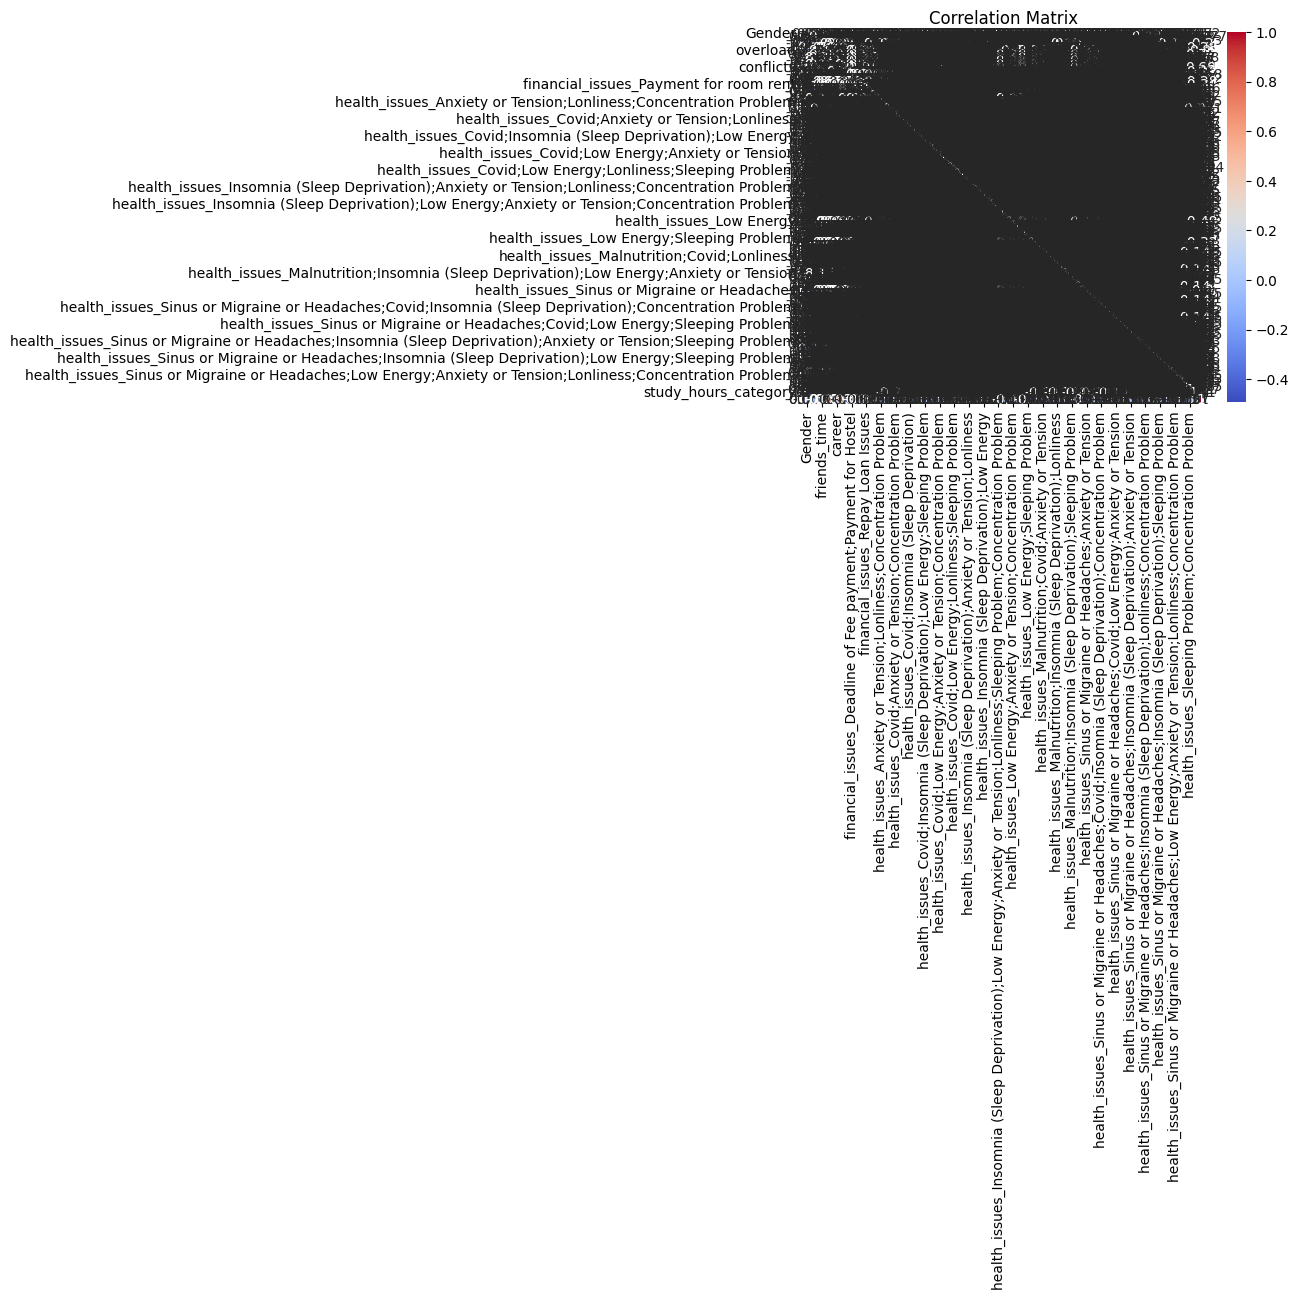

In [115]:
corr_matrix = df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix") 

In [113]:
df['study_hours_category'] = encoder.fit_transform(df['study_hours_category']) 

KeyError: 'financial_issues'

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply SelectKBest with chi-squared test
X = df.drop("stress_level", axis=1)  # Features
y = df["stress_level"]  # Target variable

# Perform the feature selection
selector = SelectKBest(chi2, k='all')  # k='all' to keep all features
X_new = selector.fit_transform(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame to view the feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores
})

# Sort features based on their score
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores) 

ValueError: Input X must be non-negative.

In [117]:
import numpy as np

# Apply absolute values to ensure all features are non-negative
X = np.abs(X)  # Apply to all features in X

# Or you can also handle negative values individually by setting them to zero or a small threshold
X[X < 0] = 0  # Set negative values to 0 

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=100)

# Fit the model
model.fit(X, y)

# Select features based on importance
selector = SelectFromModel(model, threshold="mean", max_features=5)
X_selected = selector.transform(X)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features) 

Index(['family_issues', 'friends_issues', 'unpleasant', 'career',
       'stress_factor'],
      dtype='object')


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [121]:
# Select the top 'k' features
k = 5  # For example, selecting the top 5 features
selected_columns = X.columns[selector.get_support()][:k]

# Update the dataset to only keep the selected features
X_selected = X[selected_columns] 

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the KNN model
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy * 100:.2f}%") 

KNN Model Accuracy: 56.76%


In [123]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Accuracy: {accuracy * 100:.2f}%") 

Naive Bayes Model Accuracy: 64.86%


In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_selected is the features and y is the target
X = X_selected  # Features (after feature selection)
y = y  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Initialize the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy * 100:.2f}%") 

Decision Tree Model Accuracy: 72.97%


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_selected is the features and y is the target
X = X_selected  # Features (after feature selection or encoding)
y = y  # Target column (must be continuous for regression)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}") 

Mean Squared Error: 0.667832279607548
R-squared: -0.13997804336999153


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=10)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%") 

Model Accuracy: 72.97%
